# Train Set 과 Test Set 의 필요성
- 앞장의 방법과 같이 문제와 답을 모두 알려주고 해당 범위내에서 점수를 내면 항상 100점이 나온다.
- 하나의 DataSet을 Train부분과 Test부분으로 분리하여
Trian Set로 학습을 하고 학습내용을 Test Set로 검증을 하여야 모델의 정확한 정확성을 신뢰할 수 있다.

In [1]:
# Data 불러오기
import pandas as pd
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


# Train Set와 Test Set로 분리하기

In [2]:
# Train Set
train_input = fruits.loc[:34, ['length','weight']]
train_input.tail()

train_target = fruits.loc[:34, ['name']]
train_target.tail()

,name
30,apple
31,apple
32,apple
33,apple
34,apple


In [3]:
# Train Set 의 갯수 확인하기
len(train_input) == len(train_target)

True

In [4]:
# Test Set
test_input = fruits.loc[35:, ['length','weight']]
test_input.tail()

test_target = fruits.loc[35:, ['name']]
test_target.tail()

,name
44,berry
45,berry
46,berry
47,berry
48,berry


### KNN을 이용한 분류

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
kn = KNeighborsClassifier()

In [7]:
# 학습 시키기
kn.fit(train_input,train_target)

/Users/reum/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [8]:
# Test Data로 정확성 확인하기
kn.score(test_input,test_target)

0.0

# sampling 편향 발생 
- 사과로 학습시켜놓고 딸기를 물어봄.
- Train과 Test 구분시에 문제가 발생하였다.

### Numpy를 이용하여 샘플링 편향을 제거하기

In [9]:
import numpy as np

In [10]:
np.random.seed(42) # random sample을 하나로 정의하여 다른 모델에서 동일한 값으로 테스트 가능
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [11]:
# Train으로 사용될 index 번호 출력하기
index[0:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [12]:
# Train Data 구성하기
train_input = fruits.loc[list(index[0:35]),['length','weight']]
train_target = fruits.loc[list(index[0:35]),'name']

# 갯수 확인
len(train_input)== len(train_target)

True

In [13]:
# Test으로 사용될 index 번호 출력하기
index[35:]

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [14]:
# Test Data 구성하기
test_input = fruits.loc[list(index[35:]),['length','weight']]
test_target = fruits.loc[list(index[35:]),'name']

# 갯수 확인
len(test_input)== len(test_target)

True

### Data의 분포를 산포도로 확인하기

In [15]:
import matplotlib.pyplot as plt

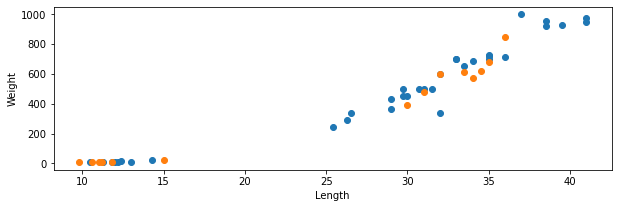

In [16]:
plt.figure(figsize=(10,3))
plt.scatter(train_input['length'],train_input['weight'])
plt.scatter(test_input['length'],test_input['weight'])

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

### KNN을 이용한 분류 


In [17]:
# 학습 시키기
kn.fit(train_input,train_target)

# Test Data로 정확성 확인하기
kn.score(test_input,test_target)

1.0

---
## sciketLearn으로 Train Set와 Test Set 나누기

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Feature 와 Target 분리하기
fruits_data = fruits[['length','weight']]
fruits_target = fruits['name']

In [20]:
train_input, test_input, train_target, test_target = train_test_split(fruits_data,fruits_target, random_state= 42)

In [21]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [22]:
import collections # 빈도수 세기

In [23]:
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 10, 'berry': 3})


In [24]:
# apple의 갯수 , berry의 갯수 
print(len(fruits[fruits['name']=='apple']))
print(len(fruits[fruits['name']=='berry']))

35
14


In [25]:
# 분류(Classification)시 데이터가 동일한 비율로 섞이게 
train_input, test_input, train_target, test_target = train_test_split(
    fruits_data,
    fruits_target,
    stratify=fruits_target,
    random_state=42
)

In [26]:
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 9, 'berry': 4})


In [27]:
# 학습시키기
kn.fit(train_input, train_target)
# 정확도 확인
kn.score(test_input,test_target)

1.0